In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
plt.style.use('fivethirtyeight')

In [2]:
df = web.DataReader('BTC-USD','yahoo','2019-12-8','2021-12-21')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-07,7589.951660,7525.711426,7547.265625,7556.237793,15453520564,7556.237793
2019-12-08,7634.606445,7476.091309,7551.338867,7564.345215,15409908086,7564.345215
2019-12-09,7618.091797,7365.985352,7561.795410,7400.899414,17872021272,7400.899414
2019-12-10,7424.022949,7246.043945,7397.134277,7278.119629,18249031195,7278.119629
2019-12-11,7324.156250,7195.527344,7277.197754,7217.427246,16350490689,7217.427246
...,...,...,...,...,...,...
2021-12-17,48004.894531,45618.214844,47653.730469,46202.144531,32902725329,46202.144531
2021-12-18,47313.828125,45598.441406,46219.253906,46848.777344,26098292690,46848.777344
2021-12-19,48089.664062,46502.953125,46853.867188,46707.015625,25154053861,46707.015625


In [18]:
np.array(df.index)#df=.set_index(pd,DatetimeIndex(df['Date'].values))

array(['2019-12-07T00:00:00.000000000', '2019-12-08T00:00:00.000000000',
       '2019-12-09T00:00:00.000000000', '2019-12-10T00:00:00.000000000',
       '2019-12-11T00:00:00.000000000', '2019-12-12T00:00:00.000000000',
       '2019-12-13T00:00:00.000000000', '2019-12-14T00:00:00.000000000',
       '2019-12-15T00:00:00.000000000', '2019-12-16T00:00:00.000000000',
       '2019-12-17T00:00:00.000000000', '2019-12-18T00:00:00.000000000',
       '2019-12-19T00:00:00.000000000', '2019-12-20T00:00:00.000000000',
       '2019-12-21T00:00:00.000000000', '2019-12-22T00:00:00.000000000',
       '2019-12-23T00:00:00.000000000', '2019-12-24T00:00:00.000000000',
       '2019-12-25T00:00:00.000000000', '2019-12-26T00:00:00.000000000',
       '2019-12-27T00:00:00.000000000', '2019-12-28T00:00:00.000000000',
       '2019-12-29T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-01-02T00:00:00.000000000', '2020-01-03

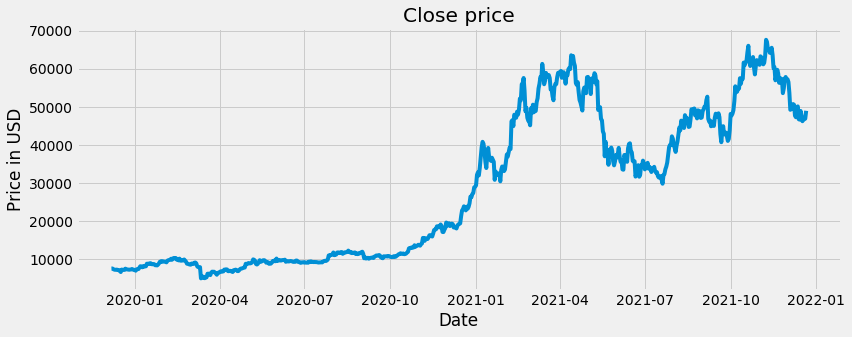

In [19]:
plt.figure(figsize=(12.2,4.5))
plt.plot(np.array(df.index), np.array(df['Close']), label='Close')
plt.title('Close price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

In [56]:
#Calculate the RSI(Relative strength index)
delta =df['Close'].diff(1)[1:]
figsize=(12.2,4.5)
positive=delta.copy()
negative= delta.copy()
positive[positive < 0] = 0
negative[negative > 0] = 0
time_period = 20
AVG_Gain = positive.rolling(window=time_period).mean()
Avg_loss = abs(negative.rolling(window=time_period).mean())
Relative_strength=AVG_Gain / Avg_loss
RSI=100.0 - (100.0/(1.0 + Relative_strength))

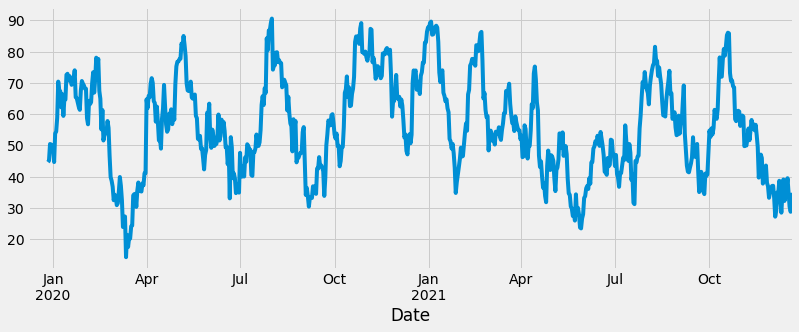

In [57]:
plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show()

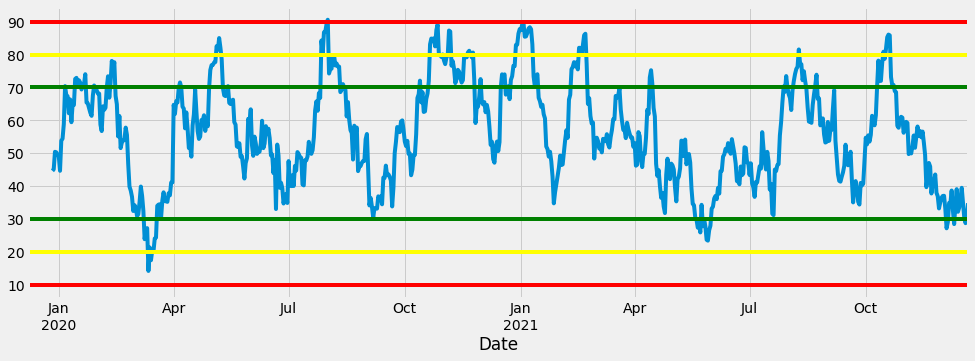

In [58]:
#Plot the RSI with over bought and over sold RSI lines / levels
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax0 = RSI.plot(ax=ax)
ax0.axhline(30,color='green')
ax0.axhline(70,color='green')
ax0.axhline(20,color='yellow')
ax0.axhline(80,color='yellow')
ax0.axhline(10,color='red')
ax0.axhline(90,color='red')

In [52]:
#if the Rsi index go below any of these 3 line , it means assets is indeed over sold
#if the Rsi index go above any of these 3 line , it means assets is indeed over bought